In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [2]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')
#Code task 2#
#Call the info method on ski_data to see a summary of the data
ski_data.info

<bound method DataFrame.info of                                   Name   Region    state  summit_elev  \
0                       Alyeska Resort   Alaska   Alaska         3939   
1                  Eaglecrest Ski Area   Alaska   Alaska         2600   
2                     Hilltop Ski Area   Alaska   Alaska         2090   
3                     Arizona Snowbowl  Arizona  Arizona        11500   
4                  Sunrise Park Resort  Arizona  Arizona        11100   
..                                 ...      ...      ...          ...   
325               Meadowlark Ski Lodge  Wyoming  Wyoming         9500   
326          Sleeping Giant Ski Resort  Wyoming  Wyoming         7428   
327                   Snow King Resort  Wyoming  Wyoming         7808   
328  Snowy Range Ski & Recreation Area  Wyoming  Wyoming         9663   
329                White Pine Ski Area  Wyoming  Wyoming         9500   

     vertical_drop  base_elev  trams  fastEight  fastSixes  fastQuads  ...  \
0            

In [3]:
#Code task 3#
#Call the head method on ski_data to print the first several rows of the data
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [4]:
#Code task 4#
#Filter the ski_data dataframe to display just the row for our resort with the name 'Big Mountain Resort'
#Hint: you will find that the transpose of the row will give a nicer output. DataFrame's do have a
#transpose method, but you can access this conveniently with the `T` property.
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


In [5]:
#Code task 5#
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


In [6]:
#Code task 6#
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [7]:
#Code task 7#
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain    2
Diamond Peak        1
Wildcat Mountain    1
Mt. Jefferson       1
Bruce Mound         1
Name: Name, dtype: int64

In [8]:
#Code task 8#
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Timberline Four Seasons, West Virginia    1
Teton Pass Ski Resort, Montana            1
Angel Fire Resort, New Mexico             1
Beaver Creek, Colorado                    1
Belleayre, New York                       1
dtype: int64

In [9]:
#Code task 9#
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Mt. Rose - Ski Tahoe, Nevada                   1
Howelsen Hill, Colorado                        1
Elm Creek Winter Recreation Area, Minnesota    1
Angel Fire Resort, New Mexico                  1
Beaver Creek, Colorado                         1
dtype: int64

In [10]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [11]:
#Code task 10#
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
dtype: int64

In [12]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Montana                12
Idaho                  12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Connecticut             5
Ohio                    5
Illinois                4
Mt. Hood                4
Virginia                4
West Virginia           4
Alaska                  3
Iowa                    3
Missouri                2
Nevada                  2
Indiana                 2
South Dakota            2
Arizona                 2
New Jersey              2
Maryland                1
Northern California     1
Rhode Island            1
Tennessee               1
Name: Region

In [13]:
#Code task 11#
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

In [14]:
#Code task 12#
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

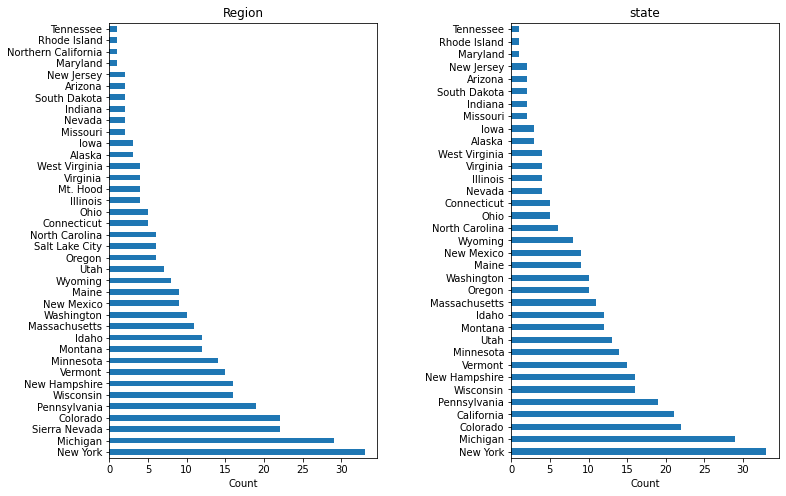

In [15]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

In [16]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


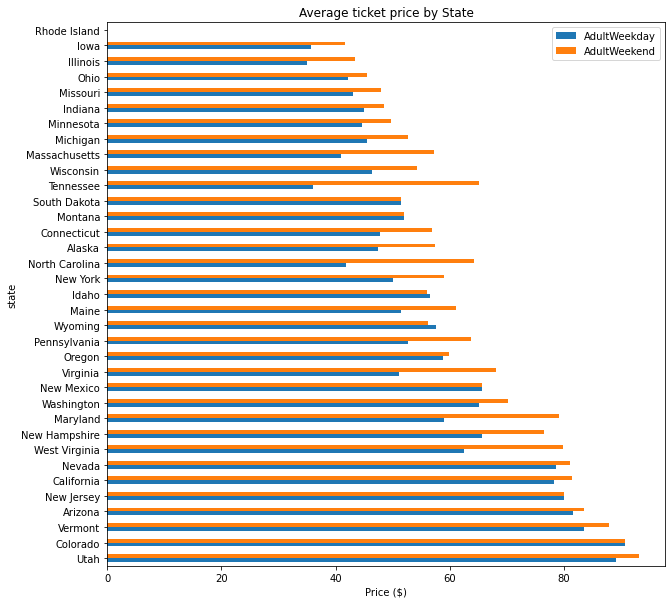

In [17]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

In [18]:
#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars='state', 
                        var_name='Ticket', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='Price')

In [19]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


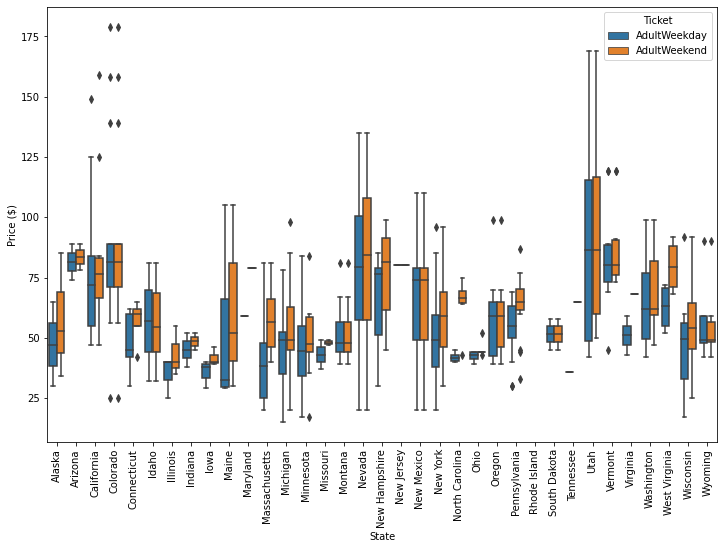

In [20]:
#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

In [21]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [22]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

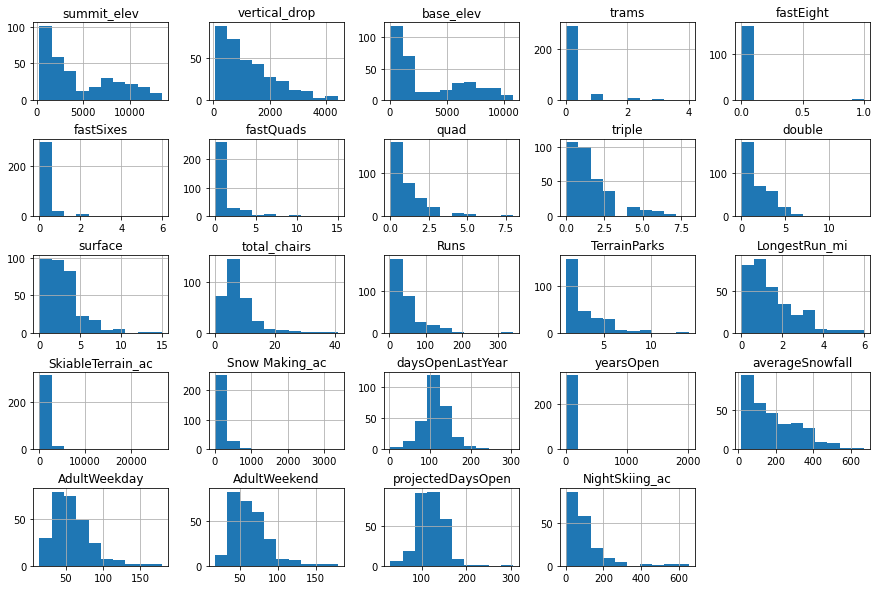

In [23]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

In [24]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data[ski_data['SkiableTerrain_ac'] > 10000]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN


In [25]:
#Code task 20#
#Now you know there's only one, print the whole row to investigate all values, including seeing the resort name
#Hint: don't forget the transpose will be helpful here
ski_data[ski_data['SkiableTerrain_ac'] > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0
fastSixes,0
fastQuads,0


In [26]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [27]:
#Code task 22#
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [28]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

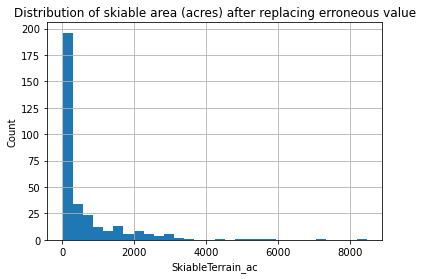

In [29]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

In [30]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [31]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0
fastSixes,2
fastQuads,7


In [32]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [33]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns='fastEight', inplace=True)

In [34]:
#Code task 25#
#Filter the 'yearsOpen' column for values greater than 100
ski_data['yearsOpen'][ski_data['yearsOpen'] > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

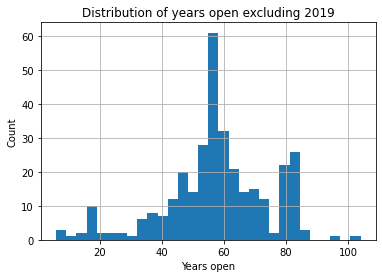

In [35]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data['yearsOpen'][ski_data['yearsOpen'] < 1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

In [36]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [37]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [38]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

In [39]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

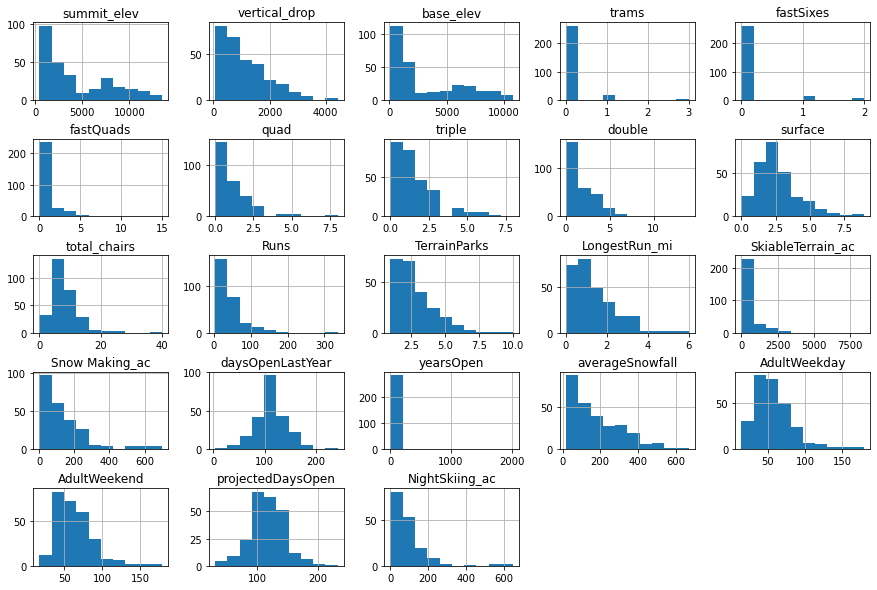

In [40]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [41]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [42]:
type(usa_states)

list

In [43]:
len(usa_states)

1

In [44]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[upper-alpha 1] Population[upper-alpha 2][3] Total area[4]  \
  Established[upper-alpha 1] Population[upper-alpha 2][3]           mi2   
0               Dec 14, 1819                      4903185         52420   
1                Jan 3, 1959                       731545        665384   
2               Feb 14, 1912                      7278717        113990   
3               Jun 15, 1836                      3017804         53179   
4                Sep 9, 1850                     39512223        163695   

           Land area[4]          Water area[4]         Numberof Reps.  
       km2          mi2      km2           mi2     km2 Numberof Reps.  
0   135767        50645   131171          1775    4597              7  
1  1723337       570641  1477953         94743  245384              1  
2   295234       113594   294207           396    1026              9  
3   137732        52035   134771          1143    2961              4  
4   423967       155779   403466          7916   20501             53

In [45]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [46]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[upper-alpha 1], Established[upp

In [47]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [48]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [49]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[upper-alpha 3]
37     Pennsylvania[upper-alpha 3]
38     Rhode Island[upper-alpha 4]
45         Virginia[upper-alpha 3]
47                   West Virginia
Name: state, dtype: object

In [50]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [51]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

In [52]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


<AxesSubplot:xlabel='AdultWeekday', ylabel='AdultWeekend'>

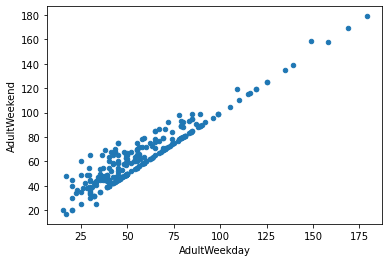

In [53]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter')

In [54]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [55]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [56]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

/Users/Haven/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-56-3c52555cc618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ski_data.dropna(subset=['AdultWeekend'], inplace=True)


In [57]:
ski_data.shape

(279, 25)

In [58]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
146,5,20.0
141,5,20.0
62,5,20.0
74,5,20.0
86,5,20.0
186,4,16.0
55,4,16.0
314,4,16.0
198,4,16.0


In [59]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [60]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     12
20.0      6
Name: %, dtype: int64

In [61]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               279 non-null    object 
 1   Region             279 non-null    object 
 2   state              279 non-null    object 
 3   summit_elev        279 non-null    int64  
 4   vertical_drop      279 non-null    int64  
 5   base_elev          279 non-null    int64  
 6   trams              279 non-null    int64  
 7   fastSixes          279 non-null    int64  
 8   fastQuads          279 non-null    int64  
 9   quad               279 non-null    int64  
 10  triple             279 non-null    int64  
 11  double             279 non-null    int64  
 12  surface            279 non-null    int64  
 13  total_chairs       279 non-null    int64  
 14  Runs               276 non-null    float64
 15  TerrainParks       235 non-null    float64
 16  LongestRun_mi      274 non

In [62]:
ski_data.shape

(279, 25)

In [63]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/ski_data_cleaned.csv"


In [64]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/state_summary.csv"


In [68]:
print(ski_data)

                                  Name   Region    state  summit_elev  \
0                       Alyeska Resort   Alaska   Alaska         3939   
1                  Eaglecrest Ski Area   Alaska   Alaska         2600   
2                     Hilltop Ski Area   Alaska   Alaska         2090   
3                     Arizona Snowbowl  Arizona  Arizona        11500   
4                  Sunrise Park Resort  Arizona  Arizona        11100   
..                                 ...      ...      ...          ...   
323                      Hogadon Basin  Wyoming  Wyoming         8000   
326          Sleeping Giant Ski Resort  Wyoming  Wyoming         7428   
327                   Snow King Resort  Wyoming  Wyoming         7808   
328  Snowy Range Ski & Recreation Area  Wyoming  Wyoming         9663   
329                White Pine Ski Area  Wyoming  Wyoming         9500   

     vertical_drop  base_elev  trams  fastSixes  fastQuads  quad  ...  \
0             2500        250      1          0   